In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib
import pickle
import matplotlib.dates as mdates

P11: 15


c:\Users\wunsc\Repos\influence-of-seasons-on-low-GW-periods\.venv\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\wunsc\Repos\influence-of-seasons-on-low-GW-periods\.venv\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\wunsc\Repos\influence-of-seasons-on-low-GW-periods\.venv\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.me

3 strongest low-water periods
[2018 2003 1976]
[28.55959501 28.60740623 28.61723623]


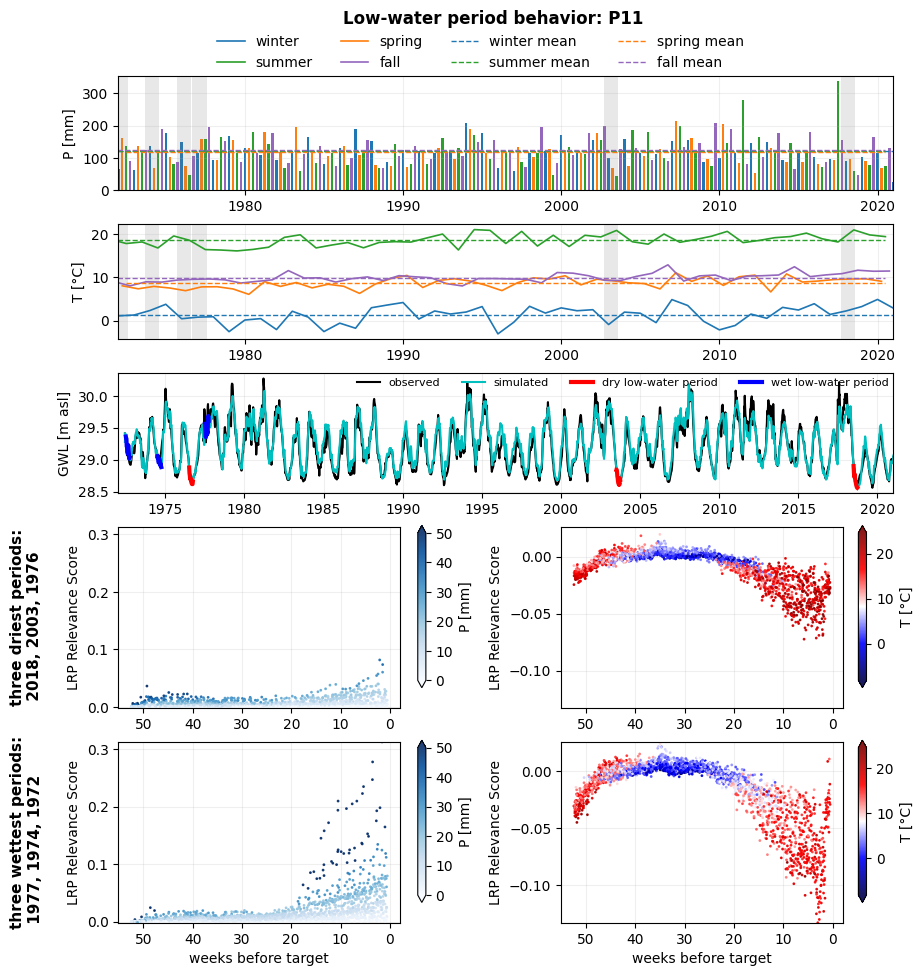

In [2]:
well_list = pd.read_csv("./locations.csv",sep=';',header = 0,encoding = 'Latin1')

for pp in [15]:#range(well_list.shape[0]):
   
    ID = well_list.alias[pp]
    print(ID+": "+str(pp))
    
    method = 'lrp.z'
    file = './Results_XAI/analysis_'+ID+'_'+method.replace('.','')+'.pickle'
    
    with open(file, 'rb') as f:
        imports = pickle.load(f)
    
    analysis = imports['analysis_mean']
    data_investigate = imports['data_investigate']
    data_investigate_ext = imports['data_investigate_ext']
    
    seqlength = 52
    y_list = imports['simulations']
    sim_members = np.zeros(shape = (y_list[0].shape[0],20))
    for i in range(20):
        sim_members[:,i] = y_list[i].reshape(-1,)
    sim_mean = np.nanmean(sim_members,axis = 1)
    sim_uncertainty = [np.quantile(sim_members, 0.05, axis=1),np.quantile(sim_members, 0.95, axis=1)]
    
    
    #%% reshape and prepare data
    T_reshaped = np.zeros(shape=(data_investigate.shape[0],seqlength))
    T_reshaped[:]=np.nan
    P_reshaped = T_reshaped.copy()
    for i in range(T_reshaped.shape[0]):
        T_reshaped[i,:] = data_investigate_ext['T'][i:i+seqlength]
        P_reshaped[i,:] = data_investigate_ext['P'][i:i+seqlength]

    T_reshaped_flat = T_reshaped.reshape(-1,1)
    P_reshaped_flat = P_reshaped.reshape(-1,1)
    analysis_P_flat = analysis[:,:,0].reshape(-1,)
    analysis_T_flat = analysis[:,:,1].reshape(-1,)
    
    steps = np.linspace(seqlength,1,seqlength)
    steps = steps.reshape(1,-1)
    steps = np.repeat(steps,T_reshaped.shape[0],axis=0)
    steps_flat = steps.reshape(-1,1)
    
    analysis_reshaped2 = np.zeros(shape=(data_investigate.shape[0],data_investigate.shape[0]+seqlength,2))
    analysis_reshaped2[:]=np.nan
    T_reshaped2 = np.zeros(shape=(data_investigate.shape[0],data_investigate.shape[0]+seqlength))
    T_reshaped2[:]=np.nan
    P_reshaped2 = T_reshaped2.copy()
    
    for i in range(data_investigate.shape[0]):
        analysis_reshaped2[i,i:i+seqlength,0] = analysis[i,:,0]
        analysis_reshaped2[i,i:i+seqlength,1] = analysis[i,:,1]
        P_reshaped2[i,i:i+seqlength] = P_reshaped[i,:]
        T_reshaped2[i,i:i+seqlength] = T_reshaped[i,:]
    
    
    # select seasons
    mask_winter = (data_investigate_ext.index.month == 12) | (data_investigate_ext.index.month == 1) | (data_investigate_ext.index.month == 2)
    mask_spring = (data_investigate_ext.index.month == 3) | (data_investigate_ext.index.month == 4) | (data_investigate_ext.index.month == 5)
    mask_summer = (data_investigate_ext.index.month == 7) | (data_investigate_ext.index.month == 8) | (data_investigate_ext.index.month == 9)
    mask_fall =(data_investigate_ext.index.month == 9) | (data_investigate_ext.index.month == 10) | (data_investigate_ext.index.month == 11)
    
    #%% Seasonal Precipitation
    temp = data_investigate_ext[['P']][mask_winter]
    temp_monthly = temp.resample('m').sum()
    idx = (temp_monthly.index.month == 12) | (temp_monthly.index.month == 1) | (temp_monthly.index.month == 2)
    temp_monthly = temp_monthly[['P']][idx]
    P_winter = []
    P_winter_years = []
    for i in range(0,temp_monthly.shape[0],3):          
        P_winter_years.append(temp_monthly.index[i].year)
        temp_sum = np.sum(temp_monthly.iloc[i:i+3,:])
        P_winter.append(temp_sum[0])
    
    temp = data_investigate_ext[['P']][mask_summer]
    temp_monthly = temp.resample('m').sum()
    idx = (temp_monthly.index.month == 6) | (temp_monthly.index.month == 7) | (temp_monthly.index.month == 8)
    temp_monthly = temp_monthly[['P']][idx]
    P_summer = []
    P_summer_years = []
    for i in range(0,temp_monthly.shape[0],3):           
        P_summer_years.append(temp_monthly.index[i].year)
        temp_sum = np.sum(temp_monthly.iloc[i:i+3,:])
        P_summer.append(temp_sum[0])
        
    temp = data_investigate_ext[['P']][mask_spring]
    temp_monthly = temp.resample('m').sum()
    idx = (temp_monthly.index.month == 3) | (temp_monthly.index.month == 4) | (temp_monthly.index.month == 5)
    temp_monthly = temp_monthly[['P']][idx]
    P_spring = []
    P_spring_years = []
    for i in range(0,temp_monthly.shape[0],3):          
        P_spring_years.append(temp_monthly.index[i].year)
        temp_sum = np.sum(temp_monthly.iloc[i:i+3,:])
        P_spring.append(temp_sum[0])
        
    temp = data_investigate_ext[['P']][mask_fall]
    temp_monthly = temp.resample('m').sum()
    idx = (temp_monthly.index.month == 9) | (temp_monthly.index.month == 10) | (temp_monthly.index.month == 11)
    temp_monthly = temp_monthly[['P']][idx]
    P_fall = []
    P_fall_years = []
    for i in range(0,temp_monthly.shape[0],3):          
        P_fall_years.append(temp_monthly.index[i].year)
        temp_sum = np.sum(temp_monthly.iloc[i:i+3,:])
        P_fall.append(temp_sum[0])
        
    #%% Seasonal Temperature
    temp = data_investigate_ext[['T']][mask_winter]
    temp_monthly = temp.resample('m').mean()
    idx = (temp_monthly.index.month == 12) | (temp_monthly.index.month == 1) | (temp_monthly.index.month == 2)
    temp_monthly = temp_monthly[['T']][idx]
    T_winter = []
    T_winter_years = []
    for i in range(0,temp_monthly.shape[0],3):          
        T_winter_years.append(temp_monthly.index[i].year)
        temp_mean = np.mean(temp_monthly.iloc[i:i+3,:])
        T_winter.append(temp_mean[0])
    
    temp = data_investigate_ext[['T']][mask_summer]
    temp_monthly = temp.resample('m').mean()
    idx = (temp_monthly.index.month == 6) | (temp_monthly.index.month == 7) | (temp_monthly.index.month == 8)
    temp_monthly = temp_monthly[['T']][idx]
    T_summer = []
    T_summer_years = []
    for i in range(0,temp_monthly.shape[0],3):        
        T_summer_years.append(temp_monthly.index[i].year)
        temp_mean = np.mean(temp_monthly.iloc[i:i+3,:])
        T_summer.append(temp_mean[0])
        
    temp = data_investigate_ext[['T']][mask_fall]
    temp_monthly = temp.resample('m').mean()
    idx = (temp_monthly.index.month == 9) | (temp_monthly.index.month == 10) | (temp_monthly.index.month == 11)
    temp_monthly = temp_monthly[['T']][idx]
    T_fall = []
    T_fall_years = []
    for i in range(0,temp_monthly.shape[0],3):           
        T_fall_years.append(temp_monthly.index[i].year)
        temp_mean = np.mean(temp_monthly.iloc[i:i+3,:])
        T_fall.append(temp_mean[0])

    temp = data_investigate_ext[['T']][mask_spring]
    temp_monthly = temp.resample('m').mean()
    idx = (temp_monthly.index.month == 3) | (temp_monthly.index.month == 4) | (temp_monthly.index.month == 5)
    temp_monthly = temp_monthly[['T']][idx]
    T_spring = []
    T_spring_years = []
    for i in range(0,temp_monthly.shape[0],3):          
        T_spring_years.append(temp_monthly.index[i].year)
        temp_mean = np.mean(temp_monthly.iloc[i:i+3,:])
        T_spring.append(temp_mean[0])
    
    #select driest years in terms of simulated GWL
    mask_summer = (data_investigate.index.month == 7) | (data_investigate.index.month == 8) | (data_investigate.index.month == 9)
    temp = pd.DataFrame(data = sim_mean,index=data_investigate.index,columns=['GWL'])
    temp = temp[['GWL']][mask_summer]
    temp_monthly = temp.resample('m').min()
    idx = (temp_monthly.index.month == 7) | (temp_monthly.index.month == 8) | (temp_monthly.index.month == 9)
    temp_monthly = temp_monthly[['GWL']][idx]
    GWL_summer = []
    GWL_summer_years = []
    for i in range(0,temp_monthly.shape[0],3):           
        GWL_summer_years.append(temp_monthly.index[i].year)
        temp_min = np.min(temp_monthly.iloc[i:i+3,:])
        GWL_summer.append(temp_min[0])
        
    k=3
    sort_idx = np.argpartition(np.array(GWL_summer), k)
    print(k, "strongest low-water periods")
    print(np.array(GWL_summer_years)[sort_idx[:k]])
    print(np.array(GWL_summer)[sort_idx[:k]])

    idx0_dry = (mask_summer == True) & (data_investigate.index.year == np.array(GWL_summer_years)[sort_idx[0]])
    idx1_dry = (mask_summer == True) & (data_investigate.index.year == np.array(GWL_summer_years)[sort_idx[1]])
    idx2_dry = (mask_summer == True) & (data_investigate.index.year == np.array(GWL_summer_years)[sort_idx[2]])
    
    idx3_dry = idx0_dry + idx1_dry + idx2_dry
    
    idx0_wet = (mask_summer == True) & (data_investigate.index.year == np.array(GWL_summer_years)[sort_idx[-1]])
    idx1_wet = (mask_summer == True) & (data_investigate.index.year == np.array(GWL_summer_years)[sort_idx[-2]])
    idx2_wet = (mask_summer == True) & (data_investigate.index.year == np.array(GWL_summer_years)[sort_idx[-3]])
    
    idx3_wet = idx0_wet + idx1_wet + idx2_wet
    
    s1=str(np.array(GWL_summer_years)[sort_idx[:3]])[1:-1].replace(' ',', ')
    s2=str(np.array(GWL_summer_years)[sort_idx[-3:]])[1:-1].replace(' ',', ')
    season = ['three driest periods:\n '+s1,
                'three wettest periods:\n '+s2]
    
    #%%
    idx_all = idx0_dry + idx1_dry + idx2_dry + idx3_wet 
    ylimP = [np.nanmin(analysis_reshaped2[idx_all,:,0]),np.nanmax(analysis_reshaped2[idx_all,:,0])]
    ylimT = [np.nanmin(analysis_reshaped2[idx_all,:,1]),np.nanmax(analysis_reshaped2[idx_all,:,1])]
    
    idx_list = [idx3_dry, idx3_wet]
    
    Tlist = []
    Plist=[]
    for ii in range(len(idx_list)):
        idx = idx_list[ii]
        T_reshaped2_ = T_reshaped2[idx]
        T_reshaped2_ = T_reshaped2_[~np.isnan(T_reshaped2_)].reshape(-1,seqlength)
        T_reshaped2_flat = T_reshaped2_.reshape(-1,1)
        Tlist.append(np.min(T_reshaped2_flat))
        Tlist.append(np.max(T_reshaped2_flat))
        P_reshaped2_ = P_reshaped2[idx]
        P_reshaped2_ = P_reshaped2_[~np.isnan(P_reshaped2_)].reshape(-1,seqlength)
        P_reshaped2_flat = P_reshaped2_.reshape(-1,1)
        Plist.append(np.min(P_reshaped2_flat))
        Plist.append(np.max(P_reshaped2_flat))

    # control colors
    vminP = np.min(Plist)
    vmaxP = np.max(Plist)
    vminT = np.min(Tlist)
    vmaxT = np.max(Tlist)

    cmap0 = matplotlib.cm.get_cmap("Blues")
    cmap1 = matplotlib.cm.get_cmap("seismic")
    
    #make plot
    fig = plot.figure(constrained_layout=True,figsize=(10,11))
    
    gs = fig.add_gridspec(12, 2)
    ax0 = fig.add_subplot(gs[0:2, 0:2]) # P
    ax1 = fig.add_subplot(gs[2:4, 0:2]) # T
    ax2 = fig.add_subplot(gs[4:6, 0:2]) # GWL
    ax31 = fig.add_subplot(gs[6:9, 0]) # driest pepriods P-LRP
    ax32 = fig.add_subplot(gs[6:9, 1]) # driest periods T-LRP
    ax41 = fig.add_subplot(gs[9:12, 0]) # wettest periods P-LRP
    ax42 = fig.add_subplot(gs[9:12, 1]) # wettest periods T-LRP
    
    xyears = [np.array(GWL_summer_years)[sort_idx[0]],
                np.array(GWL_summer_years)[sort_idx[1]],
                np.array(GWL_summer_years)[sort_idx[2]],
                np.array(GWL_summer_years)[sort_idx[-3]],
                np.array(GWL_summer_years)[sort_idx[-2]],
                np.array(GWL_summer_years)[sort_idx[-1]]]
    ax0.bar(np.array(P_winter_years)+1,P_winter,label='winter', width = 0.15,color='C0')
    ax0.bar(np.array(P_summer_years)+0.5,P_summer,label='summer', width = 0.15,color='C2')
    ax0.bar(np.array(P_spring_years)+0.25,P_spring,label='spring', width = 0.15,color='C1')
    ax0.bar(np.array(P_fall_years)+0.75,P_fall,label='fall', width = 0.15,color='C4')
    ax0ylim=ax0.get_ylim()
    ax0.bar(np.array(xyears)+0.13,[500,500,500,500,500,500],
            color='grey',alpha=0.18,width = 0.9,align='center')
    ax0.set_ylim(ax0ylim)
    ax0.set_xlim([data_investigate.index[0].year,
                    data_investigate.index[-1].year])
    ax0.grid(alpha=0.2)
    ax0.set_ylabel("P [mm]")

    ax0.hlines(np.mean(P_winter),P_winter_years[0]+1,
                P_winter_years[-1]+1,linestyles='dashed',
                color='C0',linewidth=1)
    ax0.hlines(np.mean(P_summer),P_summer_years[0]+0.5,
                P_summer_years[-1]+0.5,linestyles='dashed',
                color='C2',linewidth=1)
    ax0.hlines(np.mean(P_spring),P_spring_years[0]+0.5,
                P_spring_years[-1]+0.5,linestyles='dashed',
                color='C1',linewidth=1)
    ax0.hlines(np.mean(P_fall),P_fall_years[0]+0.5,
                P_fall_years[-1]+0.5,linestyles='dashed',
                color='C4',linewidth=1)
    
    pos1 = ax0.get_position()
    pos1 = [pos1.x0, pos1.y0+0.015,pos1.width, pos1.height-0.015] 
    ax0.set_position(pos1)
    

    ax1.plot(np.array(T_winter_years)+1,T_winter,color='C0',
                label='winter',linewidth=1.2)
    ax1.plot(np.array(T_summer_years)+0.5,T_summer,color='C2',
                label='summer',linewidth=1.2)
    ax1.plot(np.array(T_spring_years)+0.25,T_spring,color='C1',
                label='spring',linewidth=1.2)
    ax1.plot(np.array(T_fall_years)+0.75,T_fall,color='C4',
                label='fall',linewidth=1.2)
    ax1ylim=ax1.get_ylim()
    ax1.bar(np.array(xyears)+0.13,[50,50,50,50,50,50],
            color='grey',alpha=0.18,width = 0.9,align='center')
    ax1.bar(np.array(xyears)+0.13,[-50,-50,-50,-50,-50,-50],
            color='grey',alpha=0.18,width = 0.9,align='center')
    ax1.set_ylim(ax1ylim)
    ax1.set_xlim([data_investigate.index[0].year,
                    data_investigate.index[-1].year])
    
    ax1.hlines(np.mean(T_winter),T_winter_years[0]+1,
                T_winter_years[-1]+1,linestyles='dashed',
                color='C0',label='winter mean',linewidth=1)
    ax1.hlines(np.mean(T_summer),T_summer_years[0]+0.5,
                T_summer_years[-1]+0.5,linestyles='dashed',
                color='C2',label='summer mean',
                linewidth=1)
    ax1.hlines(np.mean(T_spring),T_spring_years[0]+0.5,
                T_spring_years[-1]+0.5,linestyles='dashed',
                color='C1',label='spring mean',
                linewidth=1)
    ax1.hlines(np.mean(T_fall),T_fall_years[0]+0.5,
                T_fall_years[-1]+0.5,linestyles='dashed',
                color='C4',label='fall mean',
                linewidth=1)
    
    ax1.grid(alpha=0.2)
    ax1.set_ylabel("T [°C]")
    ax1.legend(ncol=4,borderaxespad=0, frameon=False,
                loc = (0.12,2.3))
    
    pos1 = ax1.get_position()
    pos1 = [pos1.x0, pos1.y0+0.01,pos1.width, pos1.height-0.015] 
    ax1.set_position(pos1)
    
    ax2.plot(data_investigate.index,data_investigate['GWL'],'k',label='observed')
    ax2.plot(data_investigate.index,sim_mean,'c',label='simulated')
    ax2.set_xlim([data_investigate.index[0].replace(month=1),data_investigate.index[-1]])
    ax2.grid(alpha=0.2)
    ax2.set_ylabel("GWL [m asl]")
    
    lw=3
    ax2.plot(data_investigate.index[idx0_dry],sim_mean[idx0_dry],'r',linewidth=lw,label='dry low-water period')
    ax2.plot(data_investigate.index[idx1_dry],sim_mean[idx1_dry],'r',linewidth=lw)
    ax2.plot(data_investigate.index[idx2_dry],sim_mean[idx2_dry],'r',linewidth=lw)
    ax2.plot(data_investigate.index[idx0_wet],sim_mean[idx0_wet],'b',linewidth=lw,label='wet low-water period')
    ax2.plot(data_investigate.index[idx1_wet],sim_mean[idx1_wet],'b',linewidth=lw)
    ax2.plot(data_investigate.index[idx2_wet],sim_mean[idx2_wet],'b',linewidth=lw)
    ax2.legend(fontsize=8,ncol=4,borderaxespad=0, frameon=False)
    
    pos1 = ax2.get_position()
    pos1 = [pos1.x0, pos1.y0,pos1.width, pos1.height-0.01] 
    ax2.set_position(pos1)
    
    ax2.xaxis.set_major_locator(mdates.YearLocator(5))   #to get a tick every interval years
    
    idx_list = [idx3_dry, idx3_wet]
    
    for ii in range(len(idx_list)):
        if ii == 0:
            ax = [ax31,ax32]
        elif ii == 1:
            ax = [ax41,ax42]
            
        idx = idx_list[ii]
        T_reshaped2_ = T_reshaped2[idx]
        T_reshaped2_ = T_reshaped2_[~np.isnan(T_reshaped2_)].reshape(-1,seqlength)
        T_reshaped2_flat = T_reshaped2_.reshape(-1,1)
        P_reshaped2_ = P_reshaped2[idx]
        P_reshaped2_ = P_reshaped2_[~np.isnan(P_reshaped2_)].reshape(-1,seqlength)
        P_reshaped2_flat = P_reshaped2_.reshape(-1,1)
        
        steps2 = np.linspace(seqlength,1,seqlength)
        steps2 = steps2.reshape(1,-1)
        steps2 = np.repeat(steps2,T_reshaped2_.shape[0],axis=0)
        steps2_flat = steps2.reshape(-1,1)
        
        analysis_reshaped2_ = analysis_reshaped2[idx]
        analysis_reshaped2_ = analysis_reshaped2_[~np.isnan(analysis_reshaped2_)].reshape(-1,seqlength,2)
        analysis_reshaped2_P_flat = analysis_reshaped2_[:,:,0].reshape(-1,1)
        analysis_reshaped2_T_flat = analysis_reshaped2_[:,:,1].reshape(-1,1)
        
        dispersion = np.random.uniform(-0.5,0.5,size=steps2_flat.shape)
        

        scat = ax[0].scatter(steps2_flat+dispersion,analysis_reshaped2_P_flat,s=1,alpha=0.9,
                        c=P_reshaped2_flat,cmap =cmap0,vmin=0,vmax=50)
        if ii==1:
            ax[0].set_xlabel('weeks before target')
        ax[0].set_ylabel('LRP Relevance Score')
        ax[0].set_axisbelow(True)
        ax[0].grid(alpha=0.2)
        ax[0].invert_xaxis()
        ax[0].set_ylim(ylimP)
        cbar = fig.colorbar(scat, ax=ax[0],shrink=0.8,aspect=20,anchor =(0,0.5), extend='both')
        cbar.set_label(label="P [mm]",rotation=90)
        
        scat = ax[1].scatter(steps2_flat+dispersion,analysis_reshaped2_T_flat,s=1,alpha=0.9,
                                c=T_reshaped2_flat,cmap =cmap1,vmin=vminT,vmax=vmaxT)
        if ii==1:
            ax[1].set_xlabel('weeks before target')
        ax[1].set_ylabel('LRP Relevance Score')
        ax[1].set_axisbelow(True)
        ax[1].grid(alpha=0.2)
        ax[1].invert_xaxis()
        ax[1].set_ylim(ylimT)
        cbar = fig.colorbar(scat, ax=ax[1],shrink=0.8,aspect=20,anchor =(0.4,0.5), extend='both')
        cbar.set_label(label="T [°C]",rotation=90)
        
        ax[0].text(77,ylimP[1]/2, season[ii],rotation='vertical',fontweight='bold',fontsize=11,
                        verticalalignment = 'center')
        
        
        pos1 = ax[0].get_position()
        pos1 = [pos1.x0, pos1.y0,pos1.width, pos1.height-0.02] 
        ax[0].set_position(pos1)
        
        pos1 = ax[1].get_position()
        pos1 = [pos1.x0+0.02, pos1.y0,pos1.width, pos1.height-0.02] 
        ax[1].set_position(pos1)

    
    plot.suptitle('Low-water period behavior: '+ID,
                    fontweight = 'bold',
                    y=0.94)
    plot.savefig('./Results_XAI/low_water_periods/'+ID+'.png',bbox_inches='tight',dpi=300)
    plot.show()